# Tiina Nokelainen

## Leave-subject-out cross-validation


### Used libraries
- Pandas Numpy
- Sklearn neighbors: K neighbor classifier 
- Matplot library - pyplot (just for fun)

### Used methods
Firstly z-score on subject level (used the example code from the slides with a little change). I used the Sklearn knn classifier with euclidean distance and uniform weights (these are default) and k-value of 37. C-index value is calculated to every fold (one fold being one subject). 

### Best and worse results
- Best C-index when the test set is subject 28: 0.82
- Worst C-index with subject 6: 0.49

### Average result
Average C-index was 0.63

### Own interpretation
C-index score varies quite a lot between the worst (0.49) and the best (0.82) score. Pain levels are very hard to put in scales (pain levels are individual) and that probably affected the results even though the z-score was applied in subject level. 


### All c-index values

| Subject id | C-index | 
| --- | --- | 
| 1 | 0.76 |
| 2 | 0.57 |
| 3 | 0.52 |
| 4 | 0.69 |
| 5 | 0.59 |
| 6 | 0.49 |
| 7 | 0.66 |
| 8 | 0.67 |
| 9 | 0.53 |
| 10 | 0.58 |
| 11 | 0.66 |
| 12 | 0.64 |
| 13 | 0.65 |
| 14 | 0.56 |
| 15 | 0.79 |
| 16 | 0.69 |
| 17 | 0.70 |
| 18 | 0.71 |
| 19 | 0.65 |
| 20 | 0.51 |
| 21 | 0.66 |
| 22 | 0.52 |
| 23 | 0.67 |
| 24 | 0.50 |
| 25 | 0.61 |
| 26 | 0.57 |
| 27 | 0.69 |
| 28 | 0.82 |
| 29 | 0.63 |
| 30 | 0.64 |
| 31 | 0.56 |


In [15]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

read = pd.read_csv("paindata.csv")

featcols = ['feat1', 'feat2', 'feat3', 'feat4']
zscore = lambda x: (x - x.mean()) / x.std()

# subject-level z-score
dfs = read.copy()
dfs[featcols] = dfs.groupby(dfs.subject)[featcols].transform(zscore)

In [2]:
def cindex(predictions, truevalues):

    n = 0
    n_sum = 0
    for i in range(len(truevalues)):
        t = truevalues[i]
        p = predictions[i]
        for j in range(i+1,len(truevalues)):
            nt = truevalues[j]
            np = predictions[j]
            if (t != nt):
                n += 1
                if (p < np and t < nt) or (p > np and t > nt):
                        n_sum += 1
                elif p == np:
                    n_sum += 0.5
    return n_sum/n

In [12]:
data = dfs.drop(["test","label_time"], axis=1).values

data

array([[ 1.00000000e+00,  1.00000000e+00,  1.52426212e+00,
         5.16253124e-02, -5.49833102e-01, -1.24664567e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.52426212e+00,
        -4.43984423e-01,  2.22669759e-03, -1.22992566e+00],
       [ 1.00000000e+00,  1.00000000e+00,  9.84723653e-01,
         1.13986901e+00, -5.26649673e-03, -1.21198318e+00],
       ...,
       [ 3.10000000e+01,  3.00000000e+00, -1.05441094e+00,
        -1.30460878e+00, -7.06942842e-01,  8.27783740e-01],
       [ 3.10000000e+01,  3.00000000e+00, -1.15002289e+00,
        -3.61097886e-01,  4.57559378e-01,  8.47852130e-01],
       [ 3.10000000e+01,  3.00000000e+00, -1.17022623e+00,
        -6.37736899e-01,  1.03565268e-01,  8.68996175e-01]])

In [13]:
# the amount of different subjects which is in this case 31
# subject's ids are from 1 to 31
ids = pd.Series(dfs.iloc[:,0]).unique()
n = len(ids)

knn = KNeighborsClassifier(n_neighbors=37)

# this is just for the comparison of average c-index and c-index with all instances' predictions
predictions = []
labels = []
all_cindex = []



# leave-one-subject-out cross-validation
# 31 subjects, 31 folds
# n = 31
for i in range(1):
    
    # train_set has all but one subject (subject which id is ids[n])
    train_set = np.array(list(filter(lambda x: x[0] != ids[i], data)))
    # test_set with only one subject (subject id is ids[n])
    test_set = np.array(list(filter(lambda x: x[0] == ids[i], data)))
    
    # splits training and test sets from labels and features
    # also removes subject-column
    X_train, Y_train = train_set[:,2:], train_set[:,1]
    X_test, Y_test = test_set[:,2:], test_set[:,1]
    
    print(X_test)

    # fits the training set to k-nearest neighbor model
    # k = 37
    knn.fit(X_train, Y_train)
    
    # calculates c-index for current subject
    c_index = round(cindex(list(knn.predict(X_test)), Y_test), 2)
    
    print("C-index score for subject", ids[i], "is", c_index)
    
    all_cindex.append(c_index)
    predictions += list(knn.predict(X_test))
    labels += list(Y_test)
    
print("\nAverage C-index is", round(np.mean(all_cindex), 2))
print("C-index calculated for all intances predictions separately is", round(cindex(predictions, labels), 2))

[[ 1.52426212e+00  5.16253124e-02 -5.49833102e-01 -1.24664567e+00]
 [ 1.52426212e+00 -4.43984423e-01  2.22669759e-03 -1.22992566e+00]
 [ 9.84723653e-01  1.13986901e+00 -5.26649673e-03 -1.21198318e+00]
 ...
 [-3.57330462e+00 -9.24633656e-01 -1.34018971e+00  1.82299832e+00]
 [-2.72910707e+00 -2.47537711e+00 -9.46291562e-01  1.85418480e+00]
 [-2.15399464e+00 -8.24559759e-01 -9.46291562e-01  1.88366720e+00]]
C-index score for subject 1 is 0.76

Average C-index is 0.76
C-index calculated for all intances predictions separately is 0.76


Minimum C-index score is 0.49 when the subject-fold is 6
Maximum C-index score is 0.82 when the subject-fold is 28


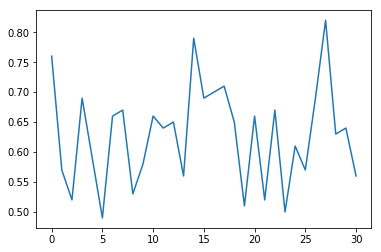

In [17]:

min_ind = np.argmin(all_cindex)
max_ind = np.argmax(all_cindex)

print("Minimum C-index score is", all_cindex[min_ind], "when the subject-fold is", min_ind+1)
print("Maximum C-index score is", all_cindex[max_ind], "when the subject-fold is", max_ind+1)

# this is just for fun
fig = plt.plot(all_cindex)